# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

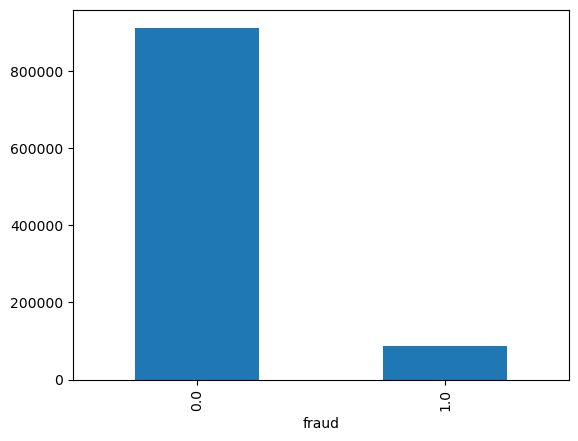

In [3]:
#1
import matplotlib.pyplot as plt

fraud = fraud['fraud'].value_counts()
fraud.plot(kind="bar")
plt.show()

#imbalanced data set:  In real business, knowing if your data is imbalanced is crucial because it might lead to a bias in the model's predictions.


In [4]:
#2 
# Split into training and testing datasets, then train a logistic regression on the training data


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features and target
X = fraud.drop(columns='fraud')
y = fraud['fraud']  # target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)



KeyError: 'fraud'

In [ ]:
#3  Use precision, recall, and F1-score in addition to accuracy.

from sklearn.metrics import classification_report

# Predictions
y_pred = model.predict(X_test)

# Evaluation
report = classification_report(y_test, y_pred)
print(report)


In [5]:
#4 Oversampling --> check if metrics like recall improved 

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Retrain the model
model.fit(X_resampled, y_resampled)
y_pred_resampled = model.predict(X_test)

# Reevaluate
report_resampled = classification_report(y_test, y_pred_resampled)
print(report_resampled)

NameError: name 'X_train' is not defined

In [6]:
#5 

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# Retrain and reevaluate
model.fit(X_undersampled, y_undersampled)
y_pred_undersampled = model.predict(X_test)

# Reevaluate
report_undersampled = classification_report(y_test, y_pred_undersampled)
print(report_undersampled)

NameError: name 'X_train' is not defined

In [ ]:
#6

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Retrain and reevaluate
model.fit(X_smote, y_smote)
y_pred_smote = model.predict(X_test)

# Reevaluate
report_smote = classification_report(y_test, y_pred_smote)
print(report_smote)